<font size='4'><b>Color Classification</b></font>

In this project we want to create a Deep learning model for car color classification. Along the project we will first prepare the data for training and testing, then we will fit our data into a convolutional network model, and lastly we will feed our trained model new images and predict their classes.

We import the important modules for our data preparations. We use numpy for matrix and array operations, Matplotlib and cv2 for image manipulations and us will use OS for some file pathing interaction.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

<font size='3'><b>1. Data preparation</b></font>

Before training our model we need to prepare the data. The data are images of different cars classed by their color, and placed in different folders in function of their colors. There are 5 different classes of color (5 folders), white, red, green, blue and black. And each class (folder) contains 640 images of cars. (Exception: Green, 420 images). In total there are 2980 image samples available for training.

The different class folders are placed inside DATADIR file "DATASET"

In [2]:
DATADIR = "DATASET"
CATEDIR = ["White","Red","Green","Blue","Black"]

In order to access the image inside a class, we use 2 'for' loops. The first loop gives access to the DATADIR, and each class folder CATEDIR. The second loop gives access to the images inside the class folders.
The image in itself is useless as a data, we use cv2.imread in order to translate the image into an array. And with matplotlib imshow we can have a display of the image.

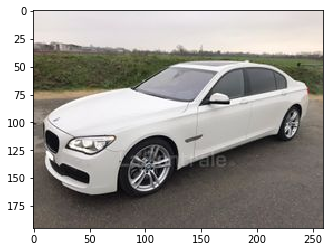

In [3]:
for class_folder in CATEDIR:
# access to the inside DATASET folder containing the different class folders
    path = DATADIR+"/"+class_folder
    for img in os.listdir(path):
    # access to the inside of each class folder, where the images samples are
        img_path = path+"/"+img
        # transform image into an array
        img_array = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show
        break
    break

The image as an array has 3 parameters, 2 parameters for the size, the weight and the height, and one parameter the number of color layers (3, in our case, referencing to RGB)

In [4]:
print("image shape: ", img_array.shape)

image shape:  (195, 260, 3)


In [5]:
print("image array: ", img_array)

image array:  [[[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [217 221 226]
  [217 221 226]
  [217 221 226]]

 [[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [217 221 226]
  [217 221 226]
  [217 221 226]]

 [[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [217 221 226]
  [217 221 226]
  [217 221 226]]

 ...

 [[ 84  93 103]
  [ 86  95 105]
  [ 84  93 103]
  ...
  [106 112 119]
  [ 97 102 111]
  [ 99 105 112]]

 [[ 88  97 107]
  [ 90  99 109]
  [ 87  96 106]
  ...
  [106 112 119]
  [ 95 101 108]
  [ 95 101 108]]

 [[ 87  96 106]
  [ 89  98 108]
  [ 86  95 105]
  ...
  [108 114 121]
  [ 95 101 108]
  [ 93  99 106]]]


In certain cases the images from our dataset can come with different size. In order to have a dataset uniform, we will resize the images using cv2.resize.

<function matplotlib.pyplot.show(*args, **kw)>

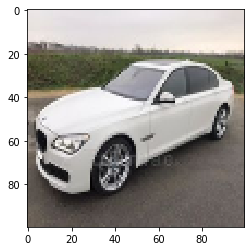

In [6]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show

The resized image retains all its features, and the image is still recognizable.
The shape of the new image array also retains the 3 parameters, but with different values for the 1st and 2nd parameters, corresponding to the weight and height.

In [7]:
print("new image shape: ", new_array.shape)

new image shape:  (100, 100, 3)


In [8]:
print("new image array: ", new_array)

new image array:  [[[230 230 236]
  [230 230 236]
  [230 230 236]
  ...
  [216 219 227]
  [216 220 226]
  [217 221 226]]

 [[230 230 235]
  [230 230 235]
  [230 230 235]
  ...
  [215 218 227]
  [216 220 226]
  [217 220 225]]

 [[228 228 234]
  [228 228 234]
  [228 228 234]
  ...
  [215 218 226]
  [215 218 226]
  [216 219 227]]

 ...

 [[ 85  94 104]
  [ 84  93 103]
  [ 88  97 107]
  ...
  [102 105 113]
  [ 96 101 109]
  [102 108 119]]

 [[ 88  97 107]
  [ 88  97 107]
  [ 89  98 108]
  ...
  [ 97 100 109]
  [ 97 101 111]
  [ 98 103 113]]

 [[ 89  98 108]
  [ 86  95 105]
  [ 88  97 107]
  ...
  [ 94  96 106]
  [ 96 100 108]
  [ 95 101 108]]]


<font size='3'><b>2. Creating the training data</b></font>

We have now all the necessary tools, to create the training data for our neural network model. Same as previously, we use the double 'for' loops in order to access and retrieve the image samples inside each class folder, and we want to assign indexes to each of our samples data folders.

We also transform each image into an array, resize them, and save them alongside their class index, inside training_data.

In [9]:
training_data = []
IMG_SIZE = 100

def create_training_data():
    for class_folder in CATEDIR:
        path = DATADIR+"/"+class_folder
        # give an index to each class folder
        class_index = CATEDIR.index(class_folder)
        for img in os.listdir(path):
            img_array = cv2.imread(path+"/"+img)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
            training_data.append([new_array, class_index])
create_training_data()

We can observe the length of training_data corresponding to the total number of image samples.

In [10]:
print("number of image samples: ", len(training_data))

number of image samples:  3018


By displaying some of the samples in our training data, we observe how our data samples are arranged.

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [12]:
# separating the images from the classes inside training_data
X = []
y = []

for images, classes in training_data:
    X.append(images)
    y.append(classes)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

We can see that the image sample are ordered by their classes. All the images of white car first, followed by the red one, and so on.

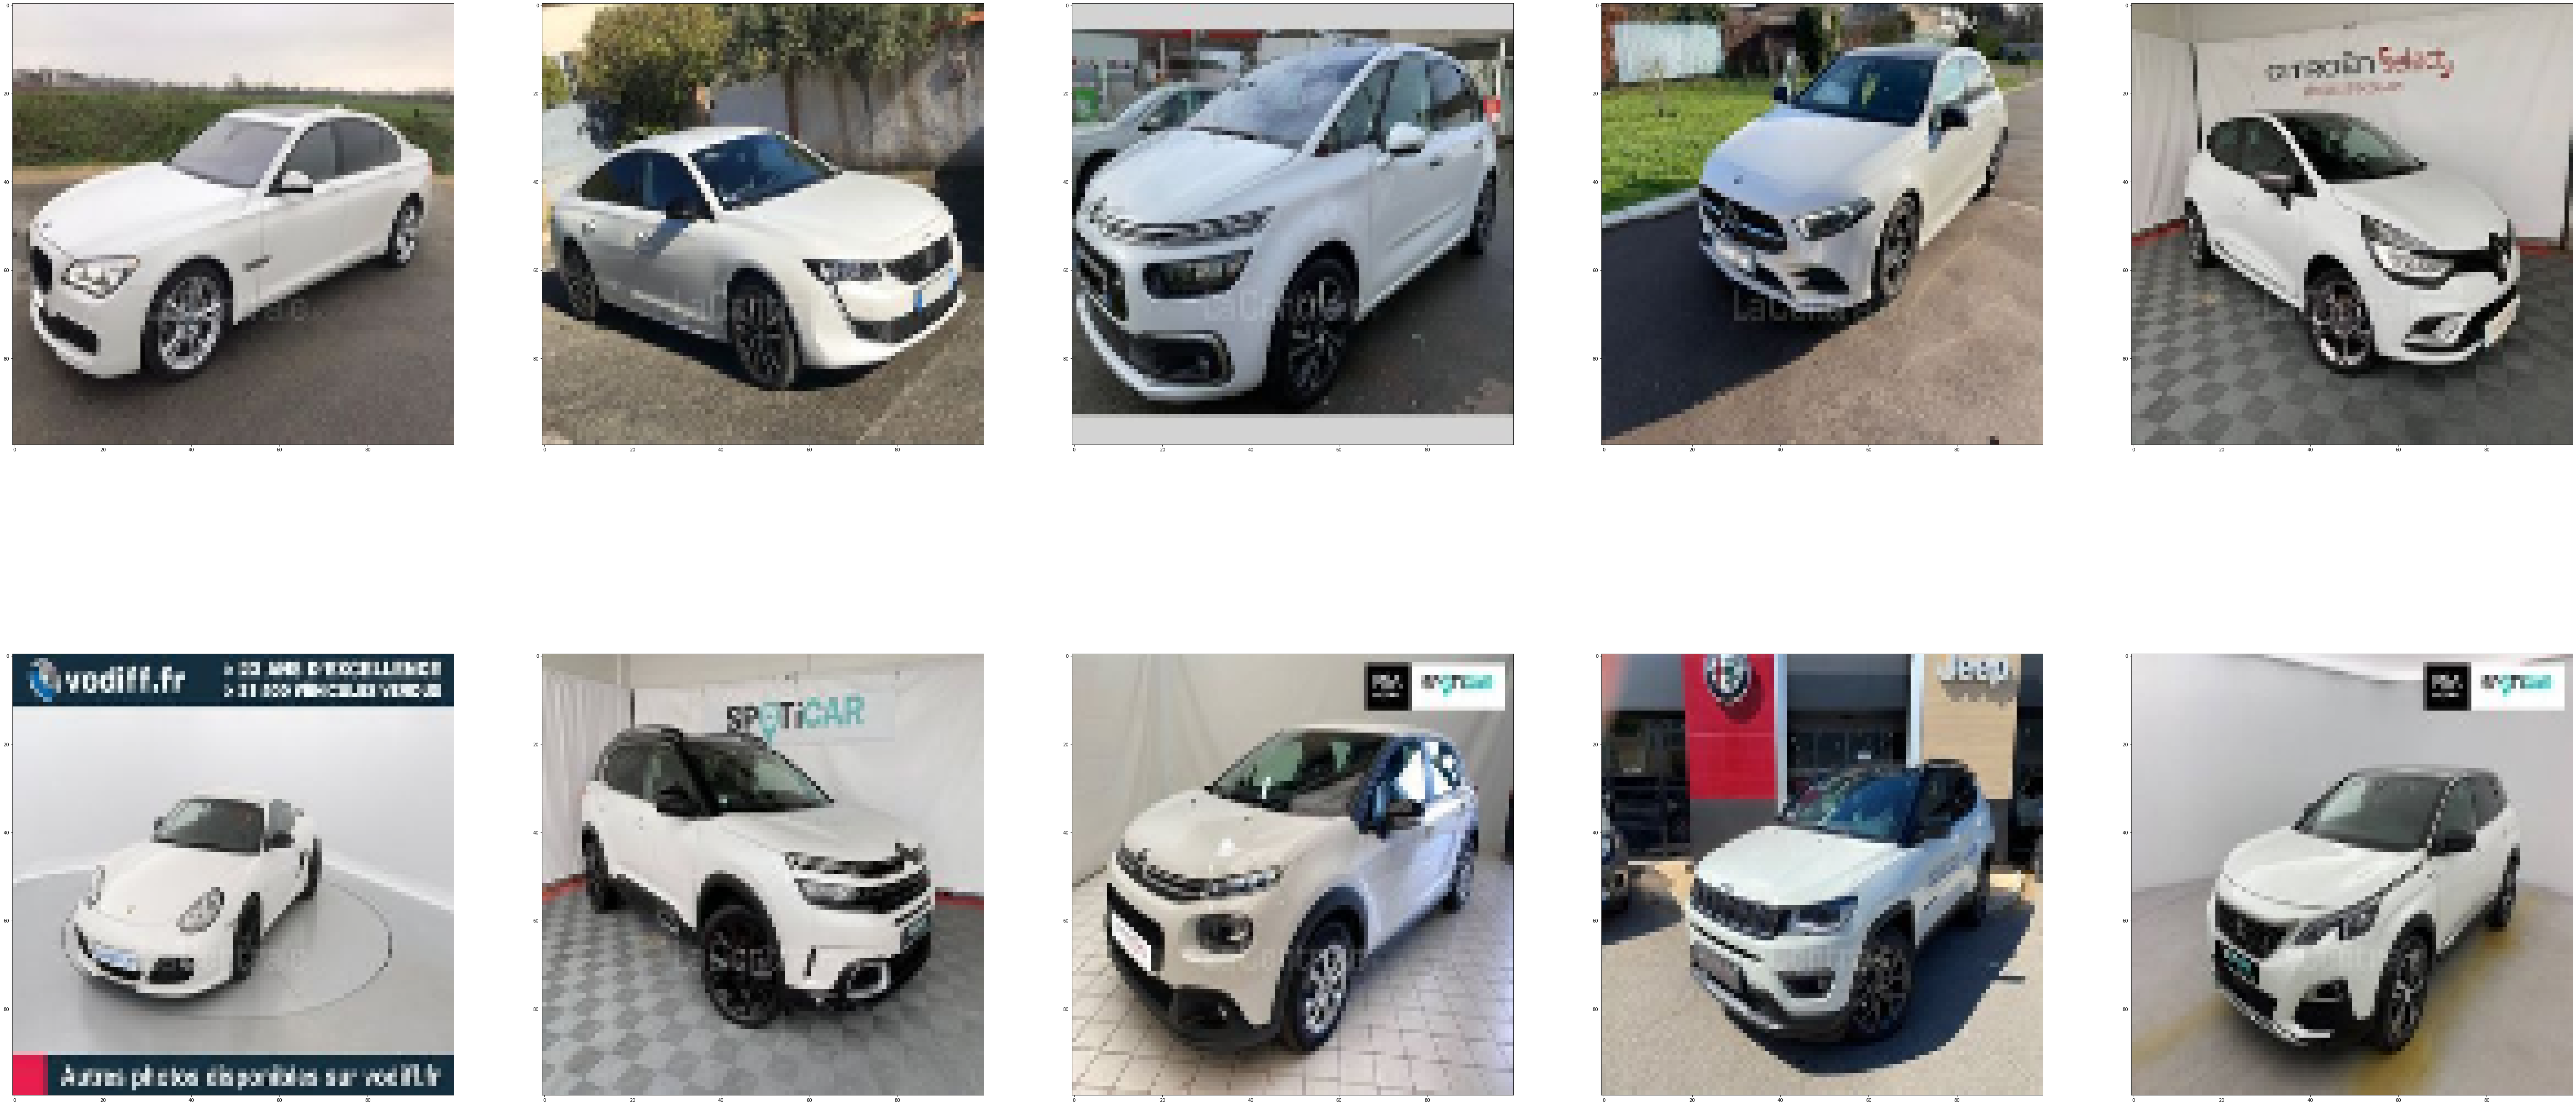

In [13]:
# displaying the first 10 image samples of our training data
fig = plt.figure(figsize=(IMG_SIZE, IMG_SIZE))

for i,img in enumerate(X[:10]):
    fig.add_subplot(4,5, i+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
plt.show()

In order to be more efficient in the training process, we will shuffle our image samples inside training_data, by importing the module random.
With random.shuffle we can shuffle the order of the image samples inside training data randomly.

In [14]:
import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

4
3
0
4
2
2
0
2
1
3


In [15]:
# separating the images from the classes inside training_data
X = []
y = []

for images, classes in training_data:
    X.append(images)
    y.append(classes)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

We can see that the image sample are ordered randomly inside training_data.

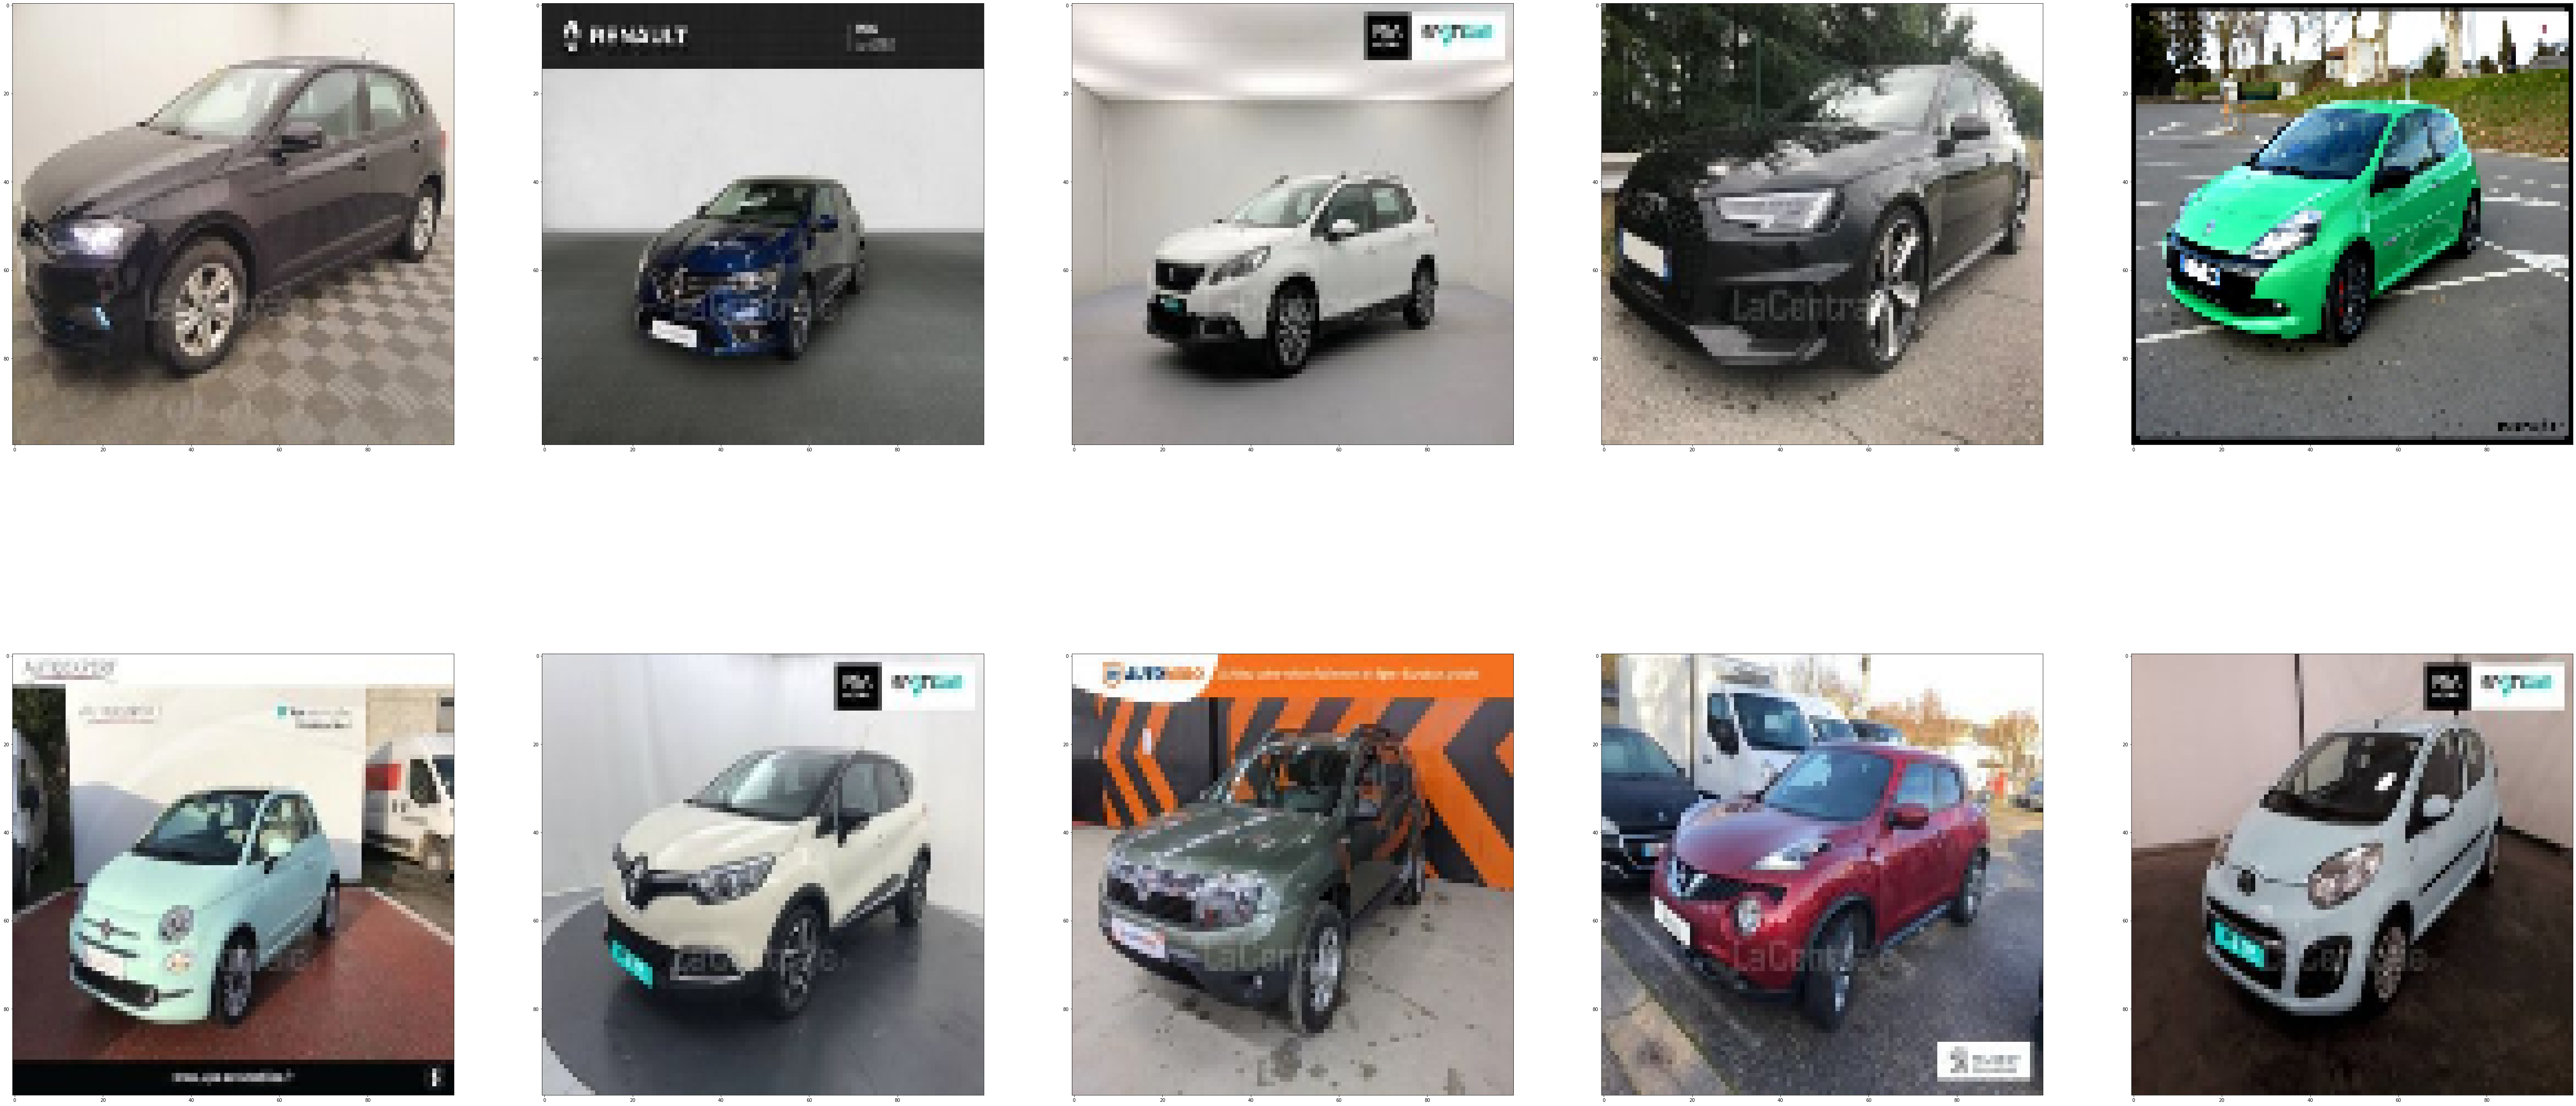

In [16]:
fig = plt.figure(figsize=(IMG_SIZE, IMG_SIZE))

for i,img in enumerate(X[:10]):
    fig.add_subplot(4,5, i+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
plt.show()

After separating the images and the indexes, from the training_data, we can observe the both of them have the same length, corresponding to the number of samples.

In [17]:
print("input shape: ", X.shape)

input shape:  (3018, 100, 100, 3)


In [18]:
print("output shape: ", y.shape)

output shape:  (3018,)


<font size='3'><b>3. Creating the training model</b></font>

We now have the training data needed to train a neural network model with. Next we need to create the neural network, and we choose to use keras and tensorflow. We import the different keras modules needed for creating a neural network model: Sequential to define the type of model; Dense, Conv2D refers respectively to a deep neural network and a convolutional network; MaxPooling2D is used by the convolutional network; and Flatten is used in order to transform a 2D convolutional network into a fully connected network.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

We have our images, data samples in X and their classes in y. In order to understand how well our model is doing with different samples not used for training, we split the data into training data and validation data, with the use of train_test_split from sklearn. We split the data into 70% training data and 30% testing data.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   shuffle = True) 

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
print("training model input shape: ", X_train.shape, "\n")
print("testing model input shape: ", X_test.shape)

training model input shape:  (2112, 100, 100, 3) 

testing model input shape:  (906, 100, 100, 3)


In [23]:
print("training model input: ", X_train)

training model input:  [[[[0.54117647 0.57647059 0.61568627]
   [0.47058824 0.51764706 0.56470588]
   [0.43529412 0.50196078 0.55294118]
   ...
   [0.89803922 0.92156863 0.91764706]
   [0.89803922 0.92156863 0.92156863]
   [0.89019608 0.90980392 0.91372549]]

  [[0.5372549  0.56078431 0.59215686]
   [0.48235294 0.52156863 0.56078431]
   [0.43529412 0.49803922 0.5372549 ]
   ...
   [0.8745098  0.89411765 0.89019608]
   [0.88235294 0.90196078 0.90588235]
   [0.84705882 0.86666667 0.87058824]]

  [[0.37647059 0.39607843 0.41176471]
   [0.3254902  0.35686275 0.38039216]
   [0.2745098  0.32156863 0.34901961]
   ...
   [0.85882353 0.88235294 0.88235294]
   [0.82745098 0.84705882 0.84705882]
   [0.76078431 0.78431373 0.78431373]]

  ...

  [[0.85098039 0.8745098  0.87058824]
   [0.83529412 0.85882353 0.85490196]
   [0.82745098 0.85098039 0.84705882]
   ...
   [0.91764706 0.94117647 0.9372549 ]
   [0.93333333 0.95294118 0.95294118]
   [0.9372549  0.95686275 0.96078431]]

  [[0.85490196 0.87058

In [24]:
y_train = to_categorical(y_train, len(CATEDIR))
y_test = to_categorical(y_test, len(CATEDIR))

In [25]:
print("training model output shape: ", y_train.shape, "\n")
print("testing model output shape: ", y_test.shape)

training model output shape:  (2112, 5) 

testing model output shape:  (906, 5)


In [26]:
print("training model output: ", y_train)

training model output:  [[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


Now, we want to create our training model, we decided to create a convolutional neural network model which is more adapted for image recognition. <br>
First, we add the input layer with the input_shape corresponding to the shape of the images, and we specify the layer activation rule. <br>
We add more convolutional layers with the activation rule, before flattening the model into a fully connected dense layer, and finally adding the output layer.<br>
We have a classification problem, the activation softmax for the output layer is more adequate.

In [27]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), 
                 activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))

model.add(Dense(len(CATEDIR), activation = "softmax"))

After adding the layers we compile them into our model, and using the Adam algorithm as the optimizer. As a classification problem, the loss function of the model can be obtained with the categorical_crossentropy.

In [28]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam", 
              metrics = ["accuracy"])

Now our training model is created and can be used to train with the different image samples, we can see the structure of our model using the model.summary.

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

We fit the training data, which mean training our model with the image sample. And we specify the batch_size, corresponding to how many samples at a time are trained, then we specify the number of epochs, which is how much time the model are going to run throughout the sample, and we specify the validation data, to understand how our model fare with image different from the training image samples.

In [30]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, 
          validation_data = (X_test, y_test))

Epoch 1/10
33/33 [==============================] - 6s 162ms/step - loss: 1.4700 - accuracy: 0.3754 - val_loss: 0.8356 - val_accuracy: 0.6302
Epoch 2/10
33/33 [==============================] - 5s 151ms/step - loss: 0.7508 - accuracy: 0.6663 - val_loss: 0.6997 - val_accuracy: 0.7152
Epoch 3/10
33/33 [==============================] - 5s 149ms/step - loss: 0.6486 - accuracy: 0.7185 - val_loss: 0.5456 - val_accuracy: 0.7848
Epoch 4/10
33/33 [==============================] - 5s 149ms/step - loss: 0.4509 - accuracy: 0.8306 - val_loss: 0.4648 - val_accuracy: 0.8135
Epoch 5/10
33/33 [==============================] - 5s 150ms/step - loss: 0.3874 - accuracy: 0.8409 - val_loss: 0.3995 - val_accuracy: 0.8543
Epoch 6/10
33/33 [==============================] - 5s 146ms/step - loss: 0.3354 - accuracy: 0.8709 - val_loss: 0.3640 - val_accuracy: 0.8709
Epoch 7/10
33/33 [==============================] - 5s 146ms/step - loss: 0.2660 - accuracy: 0.9078 - val_loss: 0.3978 - val_accuracy: 0.8543
Epoch 

<b>Small conclusion:</b><br>
We can observe that our model is relatively doing well, despite the number of samples, we obtain around 90% accuracy for the training, and 85% - 87% for the validation. In order to have a better understanding of the result, we plot the evolution of the accuracy and loss of the training and validation, in function of the number of epochs.

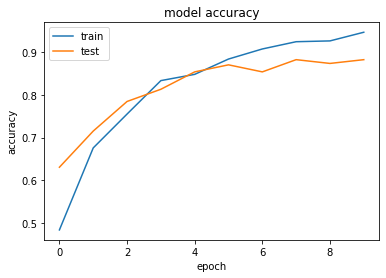

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

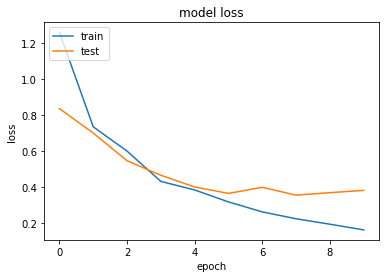

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

With the graphics, we may observe some indication of overfitting which can be explained by the simplicity of our model, and our technique of training. 

In [33]:
model.save("model_v1_1.h5")

<font size='3'><b>4. Image prediction</b></font>

We have created a model capable of predicting the color of a car, and we want to test the model using completely different images from the training or validation data. Those images aren't arranged inside the class folder so they don't posses a class label, we want to use our model to classify them (meaning determining their color for us).

In [34]:
PREDDIR = "PREDICT"
CATEDIR = ["White","Red","Green","Blue","Black"]

In [35]:
prediction_data = []
IMG_SIZE = 100

for img in os.listdir(PREDDIR):
    img_array = cv2.imread(PREDDIR+"/"+img)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
    prediction_data.append(new_array)

In [36]:
X_pred = np.array(prediction_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

We reload our saved model

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model = load_model("model_v1_1.h5", compile = True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

We predict the classes of the new input images.

In [39]:
y_pred = model.predict(X_pred)

In order to see the accuracy of the model, bellow are the images that we want to be classified.

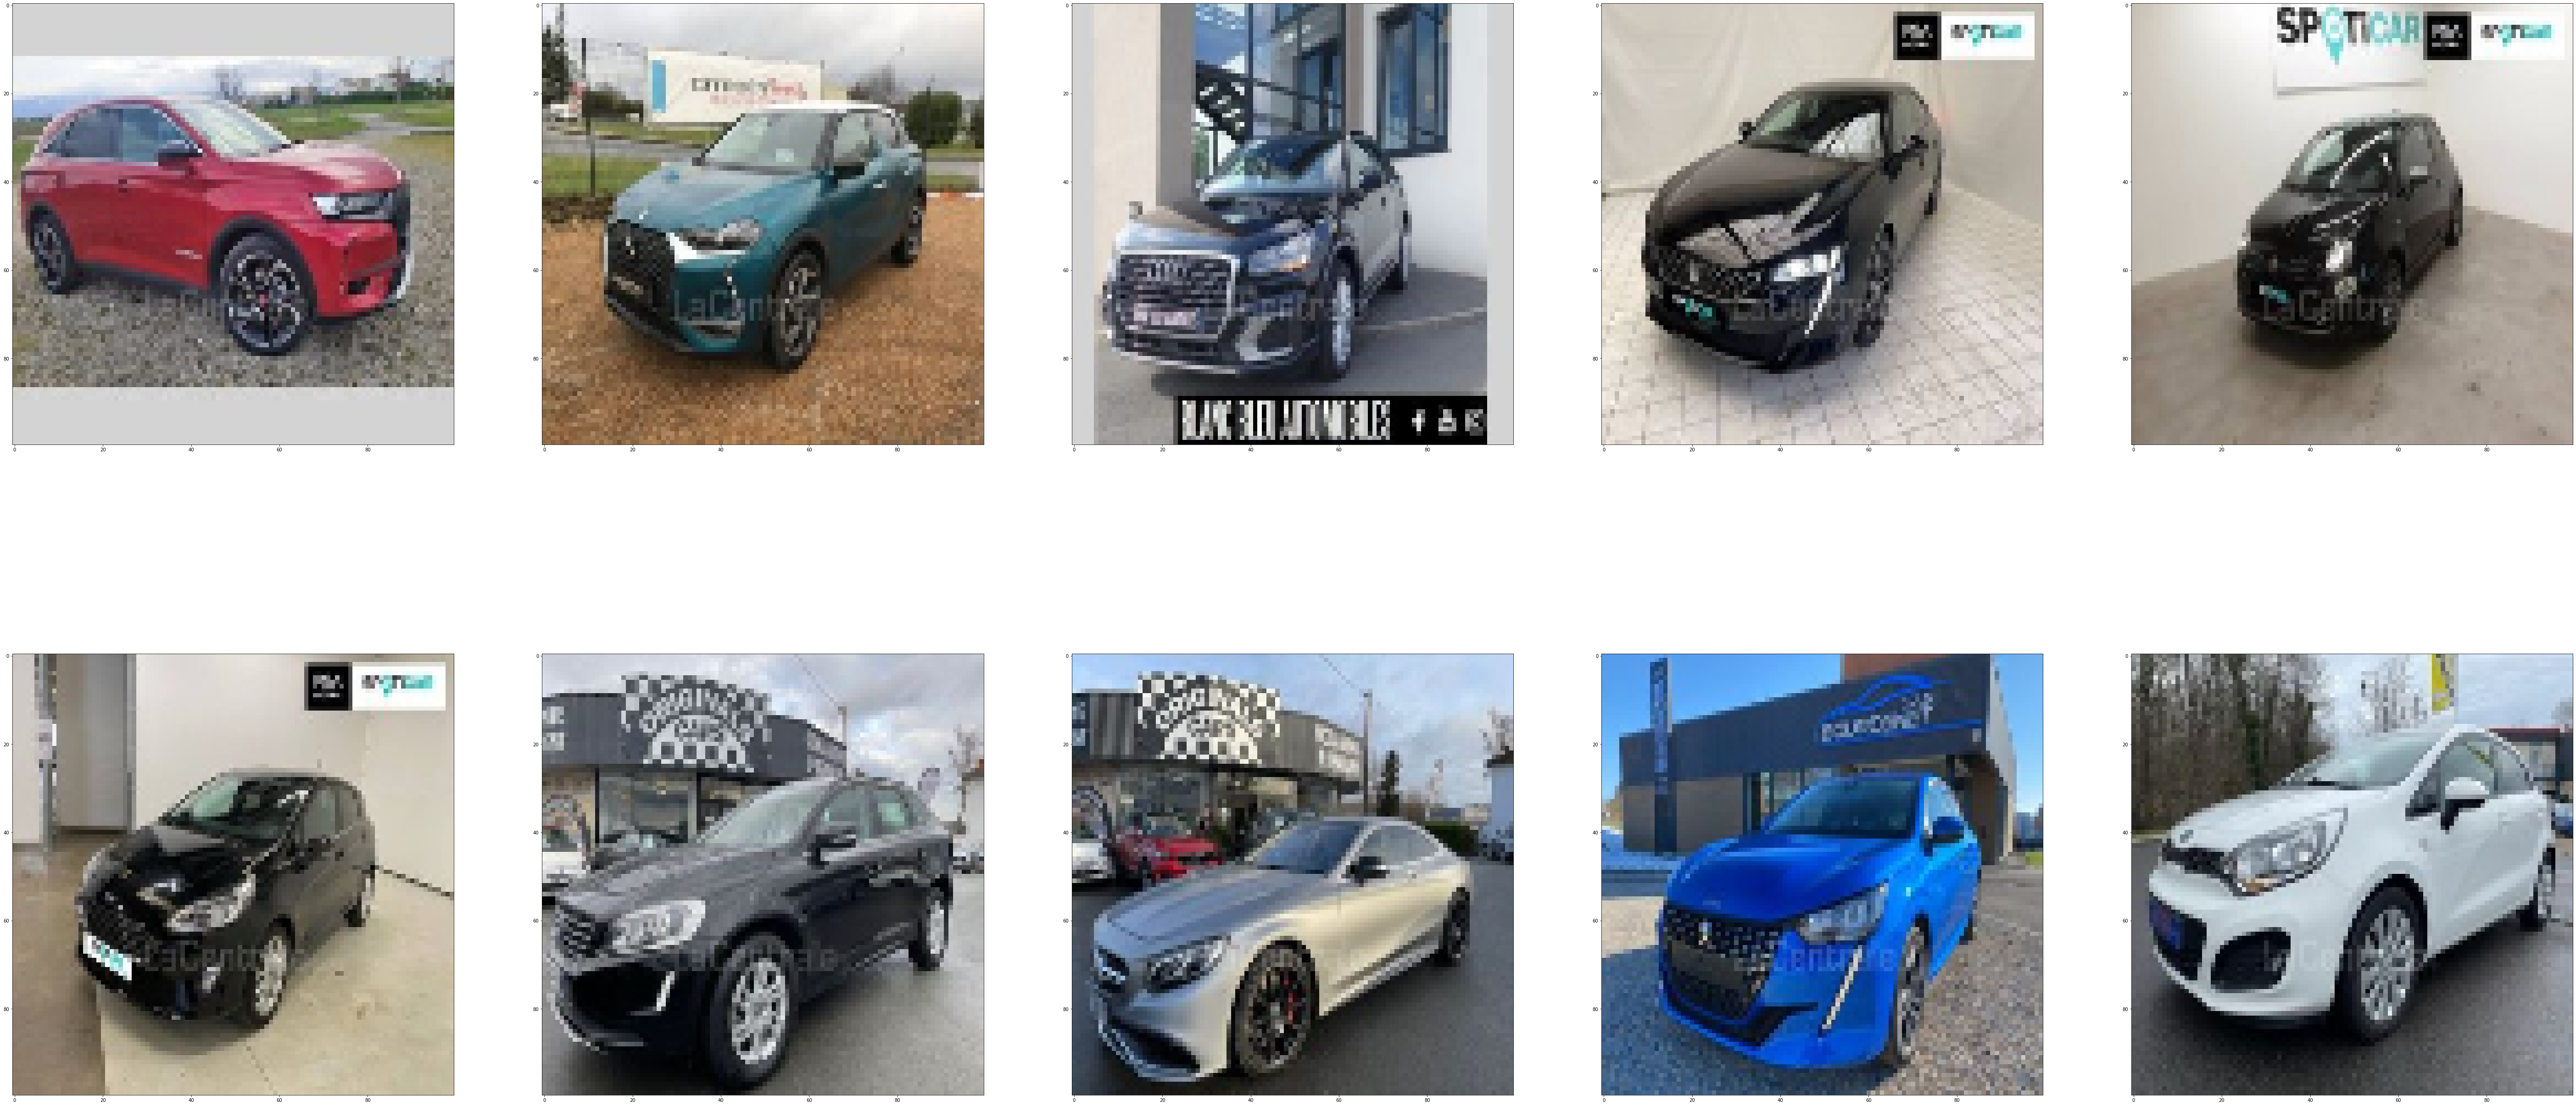

In [40]:
fig = plt.figure(figsize=(IMG_SIZE, IMG_SIZE))

for i,img in enumerate(X_pred):
    fig.add_subplot(4,5, i+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
plt.show()

We have bellow, the prediction from our model

In [41]:
for i in range(10):
    result = y_pred[i,:]
    print("image", i)
    for j in range(5):
        if result[j] == 1.0:
            print("color: ", CATEDIR[j], "\n")

image 0
color:  Red 

image 1
color:  Green 

image 2
color:  Black 

image 3
color:  Black 

image 4
color:  Black 

image 5
color:  Black 

image 6
color:  Black 

image 7
color:  White 

image 8
color:  Blue 

image 9
color:  White 



<b>Small conclusion:</b><br>
We can observe our model is capable to classify the color of a car, which was our objective in this project. <br>
The prediction of our model isn't 100% accurate, but the result can be perfected by tunning our neural network model and tweaking with the training technique.

<font size='3'><b>5. Different training model / Training technique</b></font>